In [1]:
# ROBERT HEETER
# ELEC 378 Machine Learning
# 27 January 2023

# PROBLEM SET 2


In [2]:
import scipy.io as sc
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import time
import struct


In [3]:
a = sc.loadmat('cauchy_schwarz_decoding.mat')
b = sc.loadmat('cauchy_schwarz_decoding_2.mat')


In [4]:
chrp = np.squeeze(b['chrp'])
y2 = np.squeeze(b['y2'])
L_chrp = np.shape(chrp)[0]

# find the sequence of inner products between chirp and received signal via convolution
# must time flip signal for convolution and time flip convolution back to forward direction
conv = np.flip(signal.convolve(chrp,np.flip(y2),'valid'))


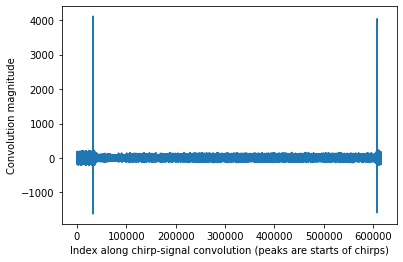

start of first chirp: 32768
start of second chirp: 608320
chirp length: 8192
signal length: 567360


In [5]:
# find peaks in conv to locate chirp start/stop tones and extract the desired signal
plt.plot(conv)
plt.xlabel('Index along chirp-signal convolution (peaks are starts of chirps)')
plt.ylabel('Convolution magnitude')
plt.show()

# find indices of the 2 largest values in the convolution (see graph)
end_chrp,start_chrp = np.argpartition(conv,-2)[-2:]

# signal starts at the end of the first chirp and ends at the start of the second chirp
y = y2[(start_chrp + L_chrp):end_chrp]

print('start of first chirp: ' + str(start_chrp)) # start of first chirp
print('start of second chirp: ' + str(end_chrp)) # start of second chirp
print('chirp length: ' + str(L_chrp)) # chirp length
print('signal length: ' + str(np.shape(y)[0])) # signal length (divisible by 40)


In [6]:
# from PROBLEM SET #1

c0 = a['c0']
c1 = a['c1']

# construct the matrix C which contains as columns the carriers c0 and c1
C = np.transpose(np.array([c0[0],c1[0]]))

# construct the matrix Y which contains as rows the received (noisy) carrier
# tones corresponding to each transmitted bit
# the width of Y should be equal to the length of one carrier tone
Y = y.reshape(-1,np.shape(C)[0])

# use matrix multiplication of C and Y to compute the sequence of inner products
# between each received (noisy) carrier tone and each known carrier tone (c0 and c1)
S = np.matmul(Y,C)

# use argmax to decode according to cauchy schwarz 
# bits should have shape (N,) where N is the number of decoded bits
bits = np.argmax(np.abs(S), axis=1)

# conversion from binary to uint8
strResult = ''.join(str(n) for n in bits)
byteResult = list(int(strResult[i : i+8][::-1], 2) for i in range(0, len(strResult), 8))
arrayResult = np.asarray([byteResult]).astype('uint8')

# writing decoded bits as a .jpg
f = open('decoded.jpg','wb')
f.write(arrayResult)
f.close()
